In [1]:
from run_sim import main
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
# set up dataframe for collecting event data
time_network, adversary = main()

Adversary: Start SCAN_HOST at 0.0s.
Adversary: Processed SCAN_HOST at 5.0s.
Adversary: Start ENUM_HOST at 5.0s.
Adversary: Processed ENUM_HOST at 7.0s.
Adversary: Start SCAN_PORT at 7.0s.
Adversary: Processed SCAN_PORT at 17.0s.
Adversary: Start EXPLOIT_VULN at 17.0s.
MTD: IPShuffle triggered 30.1s
MTD: IPShuffle deployed in the network at 30.1s.
Adversary: Processed EXPLOIT_VULN at 41.2s.
Adversary: Start BRUTE_FORCE at 41.2s.
MTD: IPShuffle triggered 60.3s
MTD: IPShuffle suspended at 60.3s due to resource occupation
Adversary: Processed BRUTE_FORCE at 61.2s.
Adversary: Start ENUM_HOST at 61.2s.
Adversary: Processed ENUM_HOST at 63.2s.
Adversary: Start SCAN_PORT at 63.2s.
Adversary: Processed SCAN_PORT at 73.2s.
Adversary: Start EXPLOIT_VULN at 73.2s.
MTD: IPShuffle finished in 51.1s at 81.2s.
MTD: Interrupted EXPLOIT_VULN at 81.2s!
Adversary: Restarting with SCAN_HOST at 83.2s!
Adversary: Start SCAN_HOST at 83.2s.
Adversary: Processed SCAN_HOST at 88.2s.
Adversary: Start ENUM_HOST at

In [3]:
print(time_network.mtd_stats.dict())
mtd_operation_record = pd.DataFrame(time_network.mtd_stats.mtd_operation_record)

mtd_operation_record

{'Total suspended MTD': 160, 'Total triggered MTD': 503, 'Total executed MTD': 336, 'Total attack interrupted': 262, 'Switch MTD interval at': {}, 'Switch MTD strategy at': {}}


,name,start_time,finish_time,duration
0,IPShuffle,30.059231,81.207778,51.148547
1,IPShuffle,90.487810,141.540254,51.052444
2,PortShuffle,121.506559,161.587417,40.080858
3,serviceDiversity,182.450053,223.077479,40.627426
4,HostTopologyShuffle,212.763314,253.467967,40.704653
...,...,...,...,...
331,UserShuffle,15181.900236,15192.242508,10.342272
332,serviceDiversity,15151.841841,15192.395117,40.553276
333,osdiversity,15212.953622,15243.011036,30.057414
334,serviceDiversity,15246.240619,15286.535702,40.295083


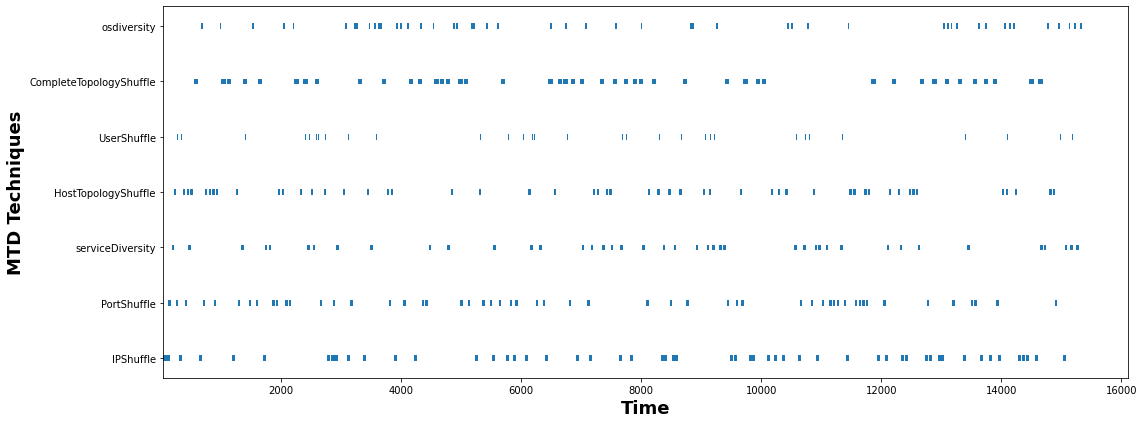

In [4]:
fig, ax = plt.subplots(1, figsize=(16, 6))
ax.barh(mtd_operation_record['name'], mtd_operation_record['duration'], left=mtd_operation_record['start_time'], height=0.1)

plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('MTD Techniques', weight='bold', fontsize=18)
fig.tight_layout()
plt.show()

In [5]:
attack_operation_record = pd.DataFrame(adversary.attack_stats.attack_operation_record)
attack_operation_record

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
0,SCAN_HOST,0.000000,5.000000,5.000000,-1,0,0,0,,[],,
1,ENUM_HOST,5.000000,7.000000,2.000000,-1,0,0,0,,[],,
2,SCAN_PORT,7.000000,17.000000,10.000000,0,1,0,0,,[],,
3,EXPLOIT_VULN,17.000000,41.157726,24.157726,0,1,0,0,,[],,
4,BRUTE_FORCE,41.157726,61.157726,20.000000,0,1,18,0,,[],,
...,...,...,...,...,...,...,...,...,...,...,...,...
2167,SCAN_PORT,15339.416650,15349.416650,10.000000,19,1,899,199,,[],,
2168,EXPLOIT_VULN,15349.416650,15369.636173,20.219523,19,1,899,199,19,[Keriann],,
2169,SCAN_NEIGHBOR,15369.636173,15374.636173,5.000000,19,1,904,200,,[],,
2170,ENUM_HOST,15374.636173,15376.636173,2.000000,19,1,904,200,,[],,


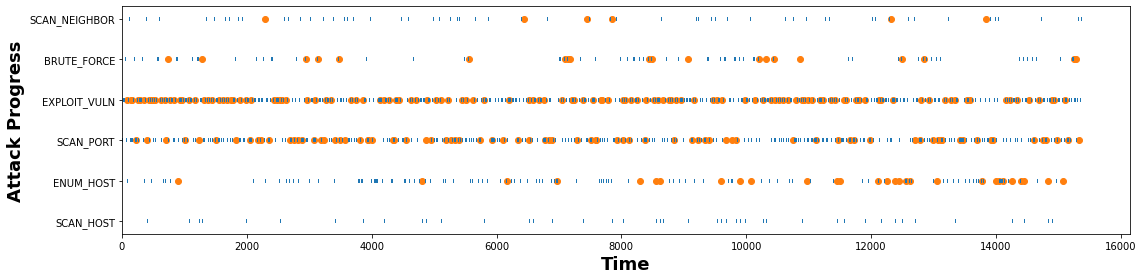

In [6]:
fig2, ax2 = plt.subplots(1, figsize=(16, 4))
ax2.barh(attack_operation_record['name'], attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.1)
interrupted_record = attack_operation_record[attack_operation_record['interrupted_by'] != '']
ax2.scatter( interrupted_record['finish_time'], interrupted_record['name'])
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Attack Progress', weight='bold', fontsize=18)
fig2.tight_layout()
plt.show()

In [7]:
attack_operation_record[(attack_operation_record['name'] == 'SCAN_PORT') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
62,SCAN_PORT,588.369771,598.369771,10.0,21,6,103,2,21,"[Hayley, Iolanthe, Lurleen]",,
215,SCAN_PORT,1937.359217,1947.359217,10.0,44,1,384,16,44,"[Nadiya, Jazmin, Hulda, Beilul]",,
258,SCAN_PORT,2277.681846,2287.681846,10.0,22,3,399,20,22,"[Theodosia, Adrea, Guinevere]",,
317,SCAN_PORT,2691.311368,2701.311368,10.0,63,1,473,25,63,"[Eugine, Lenora]",,
346,SCAN_PORT,2888.814500,2898.814500,10.0,59,1,481,28,59,"[Loren, Rodie, Kimbra]",,
362,SCAN_PORT,3006.000000,3016.000000,10.0,34,1,497,30,34,"[Ulrikaumeko, Lilyan, Sapphire]",,
448,SCAN_PORT,3619.754585,3629.754585,10.0,33,4,545,39,33,"[Allyce, Avril]",,
483,SCAN_PORT,3815.234798,3825.234798,10.0,24,2,554,42,24,[Myrle],,
580,SCAN_PORT,4318.165072,4328.165072,10.0,88,1,564,48,88,"[Carlota, Salomi]",,
603,SCAN_PORT,4490.329025,4500.329025,10.0,91,2,566,51,91,[],,


In [8]:
attack_operation_record[(attack_operation_record['name'] == 'EXPLOIT_VULN') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
11,EXPLOIT_VULN,100.207778,120.709807,20.502029,0,2,18,0,0,"[Estell, Mareah, Timmie, Leia, Nerty]",,
40,EXPLOIT_VULN,372.688177,392.830447,20.142270,21,4,62,1,21,"[Randy, Kassandra, Marcellina, Dagmar, Shelly]",,
70,EXPLOIT_VULN,636.993532,657.835236,20.841704,20,1,103,3,20,"[Carey, Pepi, Ivy, Rachael, Marie-Ann]",,
87,EXPLOIT_VULN,789.458746,809.992507,20.533761,20,3,118,4,20,"[Kirsten, Myrlene, Lela, Gisella, Cathy]",,
108,EXPLOIT_VULN,973.231394,994.332903,21.101509,20,6,168,5,20,"[Jennica, Lanni, Lorenza, Debee]",,
...,...,...,...,...,...,...,...,...,...,...,...,...
2136,EXPLOIT_VULN,15052.406328,15073.189990,20.783662,16,1,892,195,16,[],,
2145,EXPLOIT_VULN,15112.736122,15132.894851,20.158729,15,2,897,196,15,[],,
2151,EXPLOIT_VULN,15163.644067,15184.997527,21.353461,17,1,899,197,17,[],,
2162,EXPLOIT_VULN,15298.535702,15318.558010,20.022307,18,1,899,198,18,[],,


In [9]:
attack_operation_record[(attack_operation_record['name'] == 'BRUTE_FORCE') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by


In [10]:
if not os.path.exists('data_analysis'):
    os.makedirs(os.path.dirname('data_analysis'))

attack_operation_record.to_csv('data_analysis/attack_operation_record.csv',index=False)
mtd_operation_record.to_csv('data_analysis/mtd_operation_record.csv', index=False)

In [11]:
attack_operation_record = pd.read_csv('data_analysis/attack_operation_record.csv')